Found 350 images belonging to 5 classes.
Found 75 images belonging to 5 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 198s 9s/step - accuracy: 0.2313 - loss: 1.6807 - val_accuracy: 0.7467 - val_loss: 0.8696
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 612ms/step - accuracy: 0.6793 - loss: 0.9193 - val_accuracy: 0.6800 - val_loss: 0.6990
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 517ms/step - accuracy: 0.7924 - loss: 0.6192 - val_accuracy: 0.8133 - val_loss: 0.5018
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 471ms/step - accuracy: 0.8764 - loss: 0.4549 - val_accuracy: 0.9067 - val_loss: 0.3977
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 508ms/step - accuracy: 0.9226 - loss: 0.3523 - val_accuracy: 0.8933 - val_loss: 0.3465
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 443ms/step - accuracy: 0.9220 - loss: 0.2949 - val_accuracy: 0.8667 - val_loss: 0.3806
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 462ms/step - accuracy: 0.9349 - loss: 0.2606 - val_accuracy: 0.8800 - val_loss: 0.3856
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 654ms/step - accuracy: 0.9219 - loss: 0.2416 - val_accuracy: 0.8800 

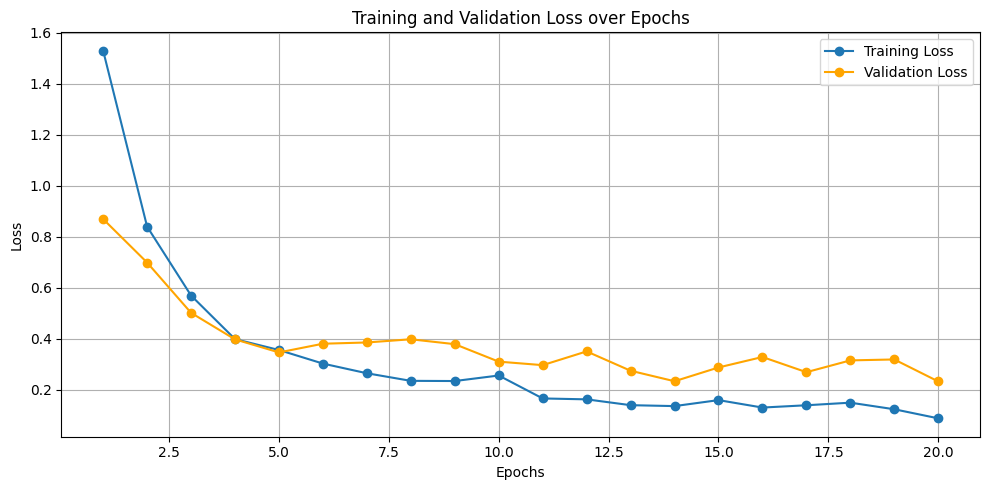

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

# Set dataset path
dataset_path = "/content/drive/My Drive/Aerial classes small"

# Image Data Generators for train, validation, and test
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')

img_size = (224, 224)  # VGG16 expects 224x224 images
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(5, activation='softmax')(x)  # Output layer with 5 classes

model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 20
history = model.fit(train_gen, validation_data=val_gen, epochs=epochs)

# Extract loss and accuracy data
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, epochs + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
